In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib
plt = matplotlib.pyplot

In [12]:
import sqlalchemy
import pandas as pd
import dask.dataframe as dd
import geopandas
import os

# from bokeh.io import push_notebook, show, output_notebook
# from bokeh.layouts import row
# from bokeh.plotting import figure
# output_notebook()

In [5]:
ct = geopandas.read_file('../shapefiles/nyct2010.shp')
tz = geopandas.read_file('../shapefiles/taxi_zones.shp')

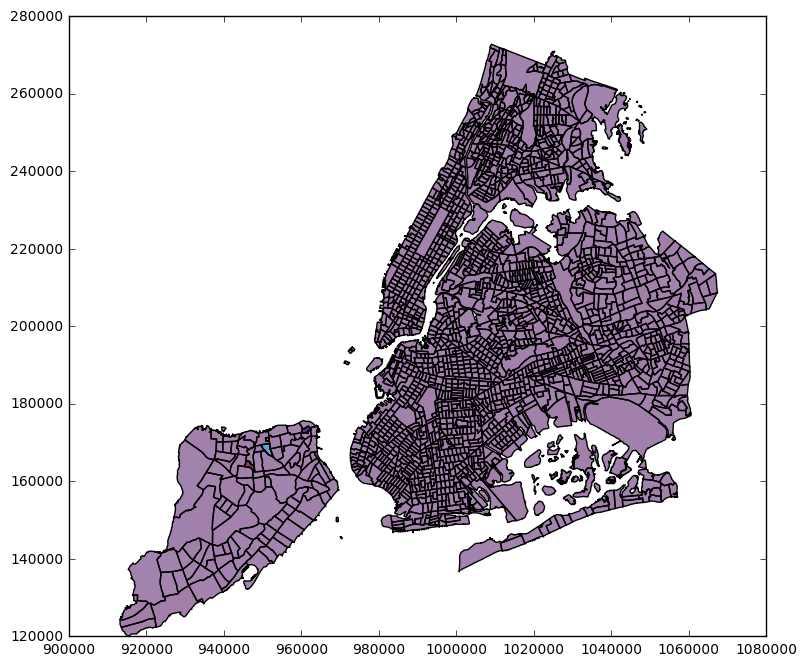

In [10]:
ct.plot(cmap=plt.cm.viridis)

plt.gcf().set_size_inches(12, 8)

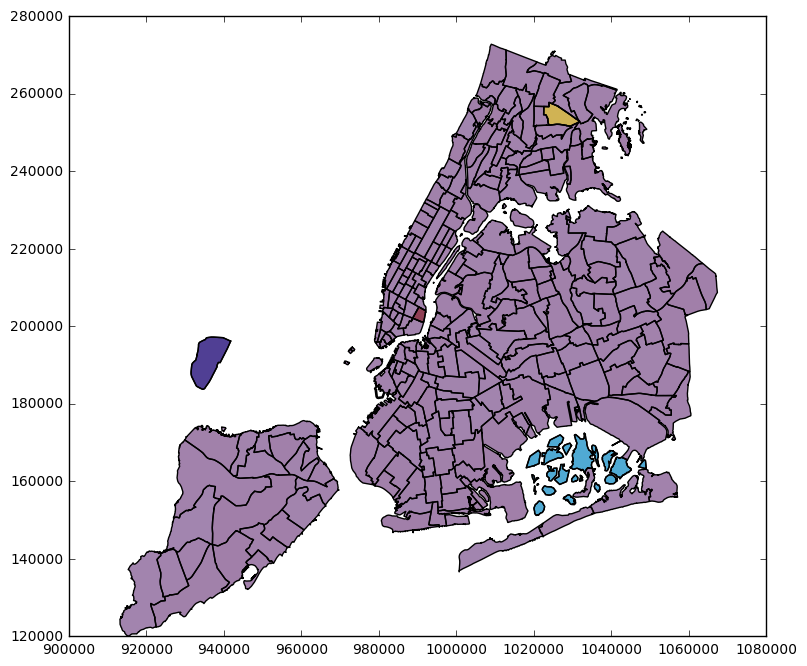

In [11]:
tz.plot(cmap=plt.cm.viridis)
tz[:4].plot(ax=plt.gca())
plt.gcf().set_size_inches(12, 8)

In [9]:
help(ct.plot)

Help on method plot in module geopandas.geodataframe:

plot(*args, **kwargs) method of geopandas.geodataframe.GeoDataFrame instance
    Plot a GeoDataFrame
    
    Generate a plot of a GeoDataFrame with matplotlib.  If a
    column is specified, the plot coloring will be based on values
    in that column.  Otherwise, a categorical plot of the
    geometries in the `geometry` column will be generated.
    
    Parameters
    ----------
    
    GeoDataFrame
        The GeoDataFrame to be plotted.  Currently Polygon,
        MultiPolygon, LineString, MultiLineString and Point
        geometries can be plotted.
    
    column : str (default None)
        The name of the column to be plotted.
    
    categorical : bool (default False)
        If False, cmap will reflect numerical values of the
        column being plotted.  For non-numerical columns (or if
        column=None), this will be set to True.
    
    cmap : str (default 'Set1')
        The name of a colormap recognized by m

In [18]:
engine = sqlalchemy.engine.create_engine(open(os.path.expanduser('~/.sqlconninfo')).read())

In [21]:
zz = pd.read_sql('SELECT distinct dropoff_location_id from taxiloc_col;', engine)
zz

,dropoff_location_id
0,NaN
1,128.0
2,167.0
3,1994.0
4,516.0
5,1814.0
6,690.0
7,1846.0
8,1627.0
9,1351.0


In [22]:
zz.sort_values('dropoff_location_id')

,dropoff_location_id
864,1.0
288,2.0
1934,3.0
1708,4.0
1635,5.0
1487,6.0
1028,7.0
486,8.0
1141,9.0
1016,10.0


In [27]:
zz2 = pd.read_sql('SELECT gid FROM nyct2010 order by gid;', engine)

In [28]:
zz2

,gid
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [29]:
mm = pd.read_sql("""
    select v.trip_id, v.pickup_datetime, v.pickup_location_id, 
           t.dropoff_location_id, t.pickup_location_id, t. from taxi_ingest_col v 
           left join taxiloc_col t ON t.trip_id = v.trip_id where v.trip_type='uber';""", engine)

In [33]:
mm.sort_values('trip_id').reset_index()

,index,trip_id,pickup_datetime,pickup_location_id,dropoff_location_id,pickup_location_id
0,4223749,1,2014-04-01 00:11:00,NaN,1952.0,140.0
1,15239447,2,2014-04-01 00:17:00,NaN,NaN,NaN
2,3050454,3,2014-04-01 00:21:00,NaN,861.0,79.0
3,16308845,4,2014-04-01 00:28:00,NaN,17.0,161.0
4,6645867,5,2014-04-01 00:33:00,NaN,15.0,162.0
5,16344172,6,2014-04-01 00:33:00,NaN,NaN,NaN
6,15573173,7,2014-04-01 00:39:00,NaN,929.0,148.0
7,18364278,8,2014-04-01 00:45:00,NaN,1283.0,230.0
8,15793477,9,2014-04-01 00:55:00,NaN,1895.0,68.0
9,16382356,10,2014-04-01 01:01:00,NaN,901.0,230.0
